In [6]:
!python -m pip install prophet

  Using cached holidays-0.17.2-py3-none-any.whl (187 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)


In [30]:
import pandas as pd
import numpy as np
from prophet import Prophet
import warnings


In [99]:
df = pd.read_csv('test_preprocessing.csv',index_col=0)

,Unnamed: 0,datetime,integration,year,month,day,time
0,0,2017-01-01 01:00:00,525.0,2017,1,1,1
1,1,2017-01-01 02:00:00,542.0,2017,1,1,2
2,2,2017-01-01 03:00:00,392.0,2017,1,1,3
3,3,2017-01-01 04:00:00,379.0,2017,1,1,4
4,4,2017-01-01 05:00:00,353.0,2017,1,1,5
...,...,...,...,...,...,...,...
35037,35058,2020-12-31 19:00:00,626.0,2020,12,31,19
35038,35059,2020-12-31 20:00:00,294.0,2020,12,31,20
35039,35060,2020-12-31 21:00:00,234.0,2020,12,31,21
35040,35061,2020-12-31 22:00:00,704.0,2020,12,31,22


In [102]:
df = df.iloc[:,0:2]

In [32]:
test_df = pd.read_csv('test_data (1).csv')

In [120]:
df['y'] = df['integration']
df['ds'] = df['datetime']

In [ ]:
result = []
for i in range(8424):
    m = Prophet(    changepoint_prior_scale=0.01,
    changepoint_range=0.95,
    interval_width=0.95)
    m.fit(df)
    future = m.make_future_dataframe(periods=336 , freq='H')
    forecast = m.predict(future)
    result.append(list(forecast.iloc[-336:,-1]))
    df.append({'datetime': test_df.iloc[i,0],'integration':test_df.iloc[i,1],'y':test_df.iloc[i,1],'ds':test_df.iloc[i,0]},ignore_index=True)
    

In [122]:
a = pd.DataFrame(result)
a.to_csv('result3.csv')

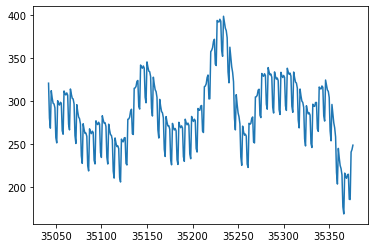

In [27]:
import matplotlib.pyplot as plt
plt.plot(forecast.iloc[-336:-1,-1])